# Parts 1 & 2 Overview

We define our linear regression model by:

$$
Y_i = \beta_0 + \beta_1 X_i + \epsilon_i
$$

By following some basic assumptions from the questions, we have that $Y_i$ the diligence score for individual $i$, $X_i$ the IQ score for individual $i$, and all other variables as normally defined for a simple linear regression function.

In this case, it would be common for us to think that IQ and diligence has a positive correlation, so we will use a one-tailed test. Let,

$$
H_0 : \beta_1 \leq 0 \newline
H_a : \beta_1 > 0
$$

, where $H_0$ suggests no positive relationship between the two measures, and $H_a$ suggests a positive relationship (i.e, increased IQ results in increased diligence).

We use the t-test statistic with $n-2$ degrees of freedom given by:

$$
t = \frac{\hat{\beta}_1-0}{SE(\hat{\beta_1})} = \frac{\hat{\beta}_1}{SE(\hat{\beta_1})}
$$

, where $SE$ is the standard error of the slope $\hat{\beta}_1$.

# Part 1

With our hypothesis test methods out of the way, we can move onto loading our data and tring to fit it within a dataframe object offered in Pandas. Since most of the steps in both Part 1 and Part 2 are similar, we will define a load function that will automatically return a pd.DataFrame object of our data for future uses.

Note that we will change our column names to X, Y respectively for intuitive purposes, and since all .csv files in this project use V1 and V2, our loading function will let us apply these steps to any of the files.

In [2]:
import pandas as pd
import numpy as np

def iqd_frame(file: str) -> pd.DataFrame:
    f = pd.read_csv(file)
    return f.astype(np.float64).dropna().rename(columns={"V1": "X", "V2": "Y"})

# test our function
q = iqd_frame('SchoolA.csv')
print(q)

                X           Y
0      126.424666   88.390601
1      115.509173  124.092819
2      114.513058  113.395594
3       92.096704  118.145201
4      111.979503  110.998773
...           ...         ...
50144  118.274940   92.758773
50145  104.997876  115.253237
50146  101.672477  119.612167
50147  107.194724  107.536633
50148  131.690554  109.805838

[50149 rows x 2 columns]


Since everything is working fine with our data load, we can move onto building our functions to get data like $\bar{Y}$, $\bar{X}$, $SE$, etc. Since we are always working with similar table structures, we can create a class **IQDilData** that will help us generate all necessary regression model characteristics.

In [8]:
from typing import List

class IQDilData:
    def __init__(self, file: str):
        self.frame = iqd_frame(file=file)
        self.X = self.frame['X']
        self.Y = self.frame['Y']
        self.xmean = self.Y.mean()
        self.ymean = self.Y.mean()

        # model characteristics
        self.slope = self.slope()
        self.intercept = self.intercept()
        self.Yreg = self.regression_frame()['Reg']
        self.SSE = self.SSE()
        self.s = self.s()
        self.se_slope = self.SE_slope()

    def slope(self) -> np.float64:
        num = 0
        den = 0
        for i in range(len(self.X)):
            num += (self.X.iloc[i] - self.xmean)*(self.Y.iloc[i] - self.ymean)
            den += (self.X.iloc[i] - self.xmean)**2
        return np.float64(num/den)

    def intercept(self) -> np.float64:
        return np.float64(self.ymean - self.slope*self.xmean)
    
    # returns a pd.DataFrame with original X, Y columns, and a third column Reg with regression values
    def regression_frame(self):
        return pd.DataFrame({'X': self.X, 'Y': self.Y, 'Reg': self.X*self.slope + self.intercept}).astype(np.float64)
    
    def error(self) -> pd.Series:
        return self.Y - self.Yreg
    
    def SSE(self) -> np.float64:
        s = 0
        for i in range(len(self.Y)):
            s += (self.Y[i]-self.Yreg.iloc[i])**2
        return s

    def s(self) -> np.float64:
        return np.float64(np.sqrt(self.SSE/(len(self.X)-2)))
    
    def SE_slope(self) -> np.float64:
        den = 0
        for i in range(len(self.X)):
            den += (self.X.iloc[i] - self.xmean)**2
        
        return np.float64(self.s/np.sqrt(den))


Now that we have our IQDilData class with all necessary model characteristics, we can get our model's intercept, slope, and standard error for the slope needed for our hypothesis results.

In [13]:
A = IQDilData(file='SchoolA.csv')

print(f"Model Slope B1: {A.slope} \nModel Intercept B0: {A.intercept} \nModel Standard Error for Slope: {A.se_slope}")

Model Slope B1: -0.5545745188180239 
Model Intercept B0: 173.43696963367267 
Model Standard Error for Slope: 0.00370145137787139


Using the above results, we can conclude our hypothesis test:

$$
t = \frac{-0.55457}{0.003701} = -149.84
$$

With a $|t|$ value so large, we have that the $p$ value is approximately 0 in this case. Since $p < \alpha = 0.05$, we reject the null hypothesis.

We can now plot the data to view our original observations as well as our fitted model.

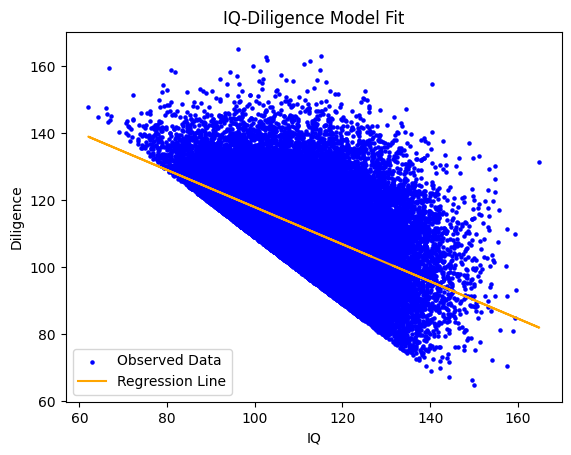

In [15]:
import matplotlib.pyplot as plt

# Loading IQDilData object using SchoolA data
A = IQDilData(file='SchoolA.csv')

# Get our data frame that includes X, Y, YReg (the prediction Y)
data = A.regression_frame()

# Plot X, Y data
plt.scatter(A.X, A.Y, s=5, color='blue', label='Observed Data')

# Plot X, YReg data (our regression line)
plt.plot(A.X, A.Yreg, color='orange', label='Regression Line')

plt.title("IQ-Diligence Model Fit")
plt.xlabel("IQ")
plt.ylabel("Diligence")
plt.legend()
plt.show()


Now we can check our residuals to see if they seem Gaussian using a histogram plot.

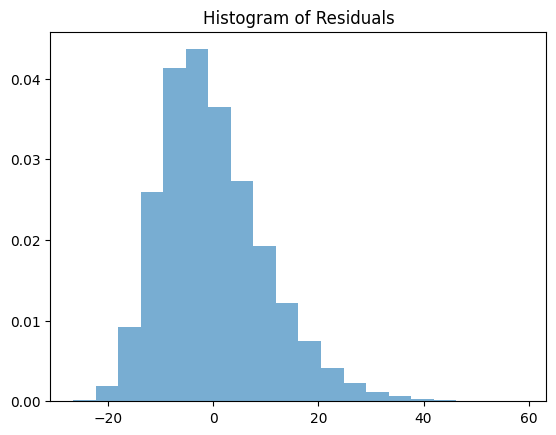

In [16]:


plt.clf()

residuals = A.Y - A.Yreg
plt.hist(residuals, bins=20, density=True, alpha=0.6)
plt.title("Histogram of Residuals")
plt.show()


Since the histogram follows a bell curve, we can conclude that the residuals are Guassian.

# Part 2

Using our IQDilData class, we can build a new model that fits the data in the SchoolB and SchoolC datasets. We repeat the process for these two datasets, skipping through some of familiar steps seen above, until we can get to our plot.

Model Slope B1: -0.8900663996418076 
Model Intercept B0: 188.99142443723093 
Model Standard Error for Slope: 0.0020473331303860996


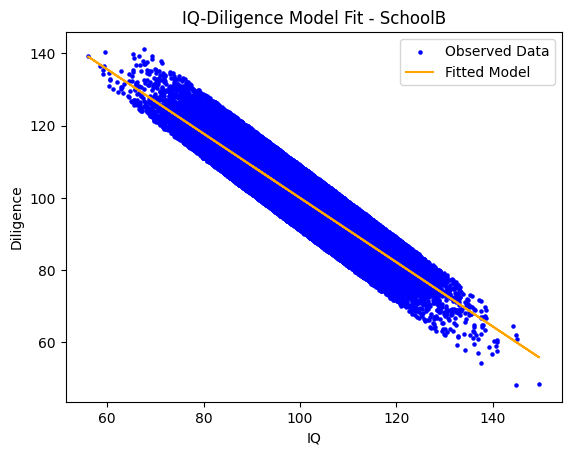

In [21]:
# SchoolB data set

B = IQDilData(file='SchoolB.csv')

plt.scatter(B.X, B.Y, s=5, color='blue', label='Observed Data')
plt.plot(B.X, B.Yreg, color='orange', label='Fitted Model')
plt.title("IQ-Diligence Model Fit - SchoolB")
plt.xlabel("IQ")
plt.ylabel("Diligence")
plt.legend()

print(f"Model Slope B1: {B.slope} \nModel Intercept B0: {B.intercept} \nModel Standard Error for Slope: {B.se_slope}")

plt.show()

Similarly, we can tell that we may in fact reject our null hypothesis once again in this case. Let's move onto the last data set, SchoolC.

Model Slope B1: -0.5617023865913346 
Model Intercept B0: 138.25237864687588 
Model Standard Error for Slope: 0.003696628372775156


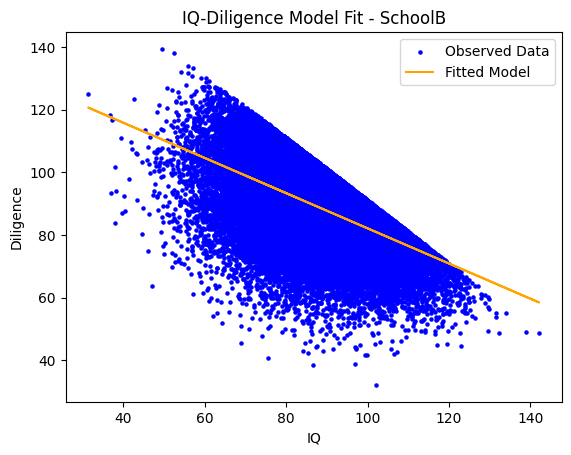

In [22]:
# SchoolC data set
C = IQDilData(file='SchoolC.csv')

plt.scatter(C.X, C.Y, s=5, color='blue', label='Observed Data')
plt.plot(C.X, C.Yreg, color='orange', label='Fitted Model')
plt.title("IQ-Diligence Model Fit - SchoolB")
plt.xlabel("IQ")
plt.ylabel("Diligence")
plt.legend()

print(f"Model Slope B1: {C.slope} \nModel Intercept B0: {C.intercept} \nModel Standard Error for Slope: {C.se_slope}")

plt.show()

And although our residuals in this case are more negative, we would still expect to see a Gaussian-like histogram if plotted.

We can conclude that all three datasets generally offer similar conclusions, that there is in fact a negative correlation between IQ and Diligence. 

Though it is clear to see that the SchoolB dataset suggests a better fitted model, with $\epsilon$ varying very little. In fact, it seems that $|Y_i - \hat{Y_i}|$ stays within a balanced range.

# Part 3

### Theory Question

With a simple linear regression model with known variance, we have:

$$
\text{Var}(\hat{B}_1) = \frac{\sigma^2}{\sum_{i=1}^{n}(X_i - \bar{X})^2}
$$

Let each of our datasets $D_1, D_2, ..., D_n$ have variance:
$$
\frac{\sigma^2}{S_{xx, D_k}}
$$

, with $S_{xx, D_k}$ our denominator in the variance formula for dataset $D_k$. Combining our $n$ datasets, we then have the combined value for $S_{xx}$:

$$
S_{xx} = \sum_{k}S_{xx, D_k} + \sum_{k}n_j(X_k - \bar{X})^2 \geq \text{max}(S_{xx})
$$

Using this logic, we can conclude that the slope of the model that fits the combined datasets $D_1, ..., D_n$ has a variance smaller or equal to that of one of our datasets $D_m$.

### Analysis of Merged Data Set

We will use our Merged.csv file with merged data to perform similar steps.

In [24]:
M = IQDilData(file='Merged.csv')

print(f"Model Slope B1: {M.slope} \nModel Intercept B0: {M.intercept} \nModel Standard Error for Slope: {M.se_slope}")


Model Slope B1: 0.0006607278200650237 
Model Intercept B0: 99.94581901638769 
Model Standard Error for Slope: 0.002580128590279095


Using our merged data set, we actually obtain a t-score of $\frac{0.0006607}{0.0025801} = 0.256$. Using $df = n-2 = 50361$, we are left with a one-tailed p-value of roughly $0.399 > 0.05 = \alpha$, so we fail to reject the null hypothesis.

Now plotting our model against observed data:



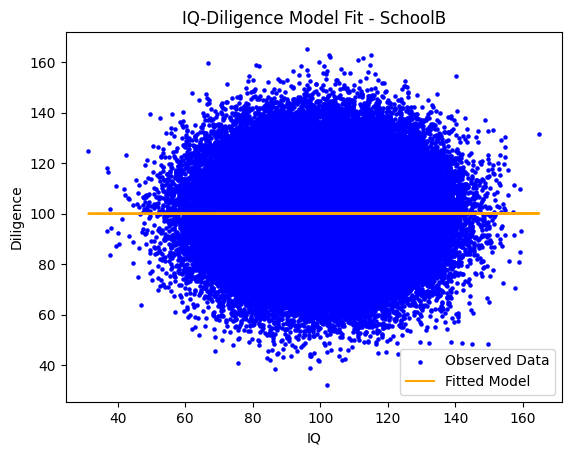

In [25]:
plt.scatter(M.X, M.Y, s=5, color='blue', label='Observed Data')
plt.plot(M.X, M.Yreg, color='orange', label='Fitted Model')
plt.title("IQ-Diligence Model Fit - SchoolB")
plt.xlabel("IQ")
plt.ylabel("Diligence")
plt.legend()
plt.show()

### Remarks (2) & (3)

The results we get when analyzing the merged data set is quite different than for previous individual data sets. 

Previously, it seems that we were analyzing slices of the entire data set. In Particular, we were looking at the top right, bottom left, and middle section of this oval-shaped scatter plot. Doing so obviously resulted in negative relationships between IQ and Diligence, but when combining the three sets of data, we essentially averaged out our slopes, where the covarariance between IQ and Diligence is almost zero, giving this merged slope to be roughly $1$.

Geometrically, slices of the oval will appear to be almost vertical. In Part 1 and 2, we saw how the different slices of our data essentially dropped downwards giving us a negative relationship. Now that we've introduced the top slice $T$ to the bottom slice $B$, we give elements $p=(x, y)\in B$ the chance to find a symmetric opposing partner $p'=(x', y') \in T$, bringing that midpoint between $p$ and $p'$ to form our model line $\hat{Y}$.